In [1]:
import mat73
import numpy as np
#import scipy.io
import os
import re
import torchvision as tv
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
print(torch.cuda.is_available())

False


In [3]:
path='/ll3/data/3/human/20220426_GIMRI_fMRI/preprocessed/s019a1001.mat'
data=mat73.loadmat(path)
print(data['mat'].shape)

(256, 256, 56, 70)


In [4]:
data=data['mat']

In [5]:
frame=20
avg=np.rot90(data[:,:,frame,:].sum(axis=2)/70)




torch.Size([1, 256, 256, 70])
torch.float64


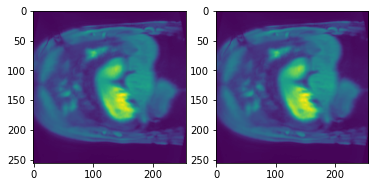

: 

: 

In [6]:
from re import A
import torch.optim as optim


class filter(nn.Module):
    def __init__(self):
        super().__init__()
        self.cov=nn.Conv3d(1,1,5,padding=2)
        nn.init.kaiming_normal_(self.cov.weight)
        self.net=nn.Sequential(self.cov)
        
    
    def forward(self,input):
        return self.net(input)

frame=20
avg_20=torch.unsqueeze(torch.tensor(data[:,:,frame,:].sum(axis=2)/70,dtype=torch.double),0).double()
avg_20_rpt=torch.unsqueeze(avg_20,3).repeat(1,1,1,70)
print(avg_20_rpt.size())
frame20=torch.unsqueeze(torch.tensor(data[:,:,frame,:],dtype=torch.double),0).double()
print(frame20.dtype)
epoch=10000
filters=filter().double()
optimizer=optim.Adam(filters.parameters(),lr=0.1)
optimizer2=optim.Adam(filters.parameters(),lr=0.01)
fig,ax=plt.subplots(1,2)
plt.sca(ax[0])
plt.imshow(avg_20_rpt[0,:,:,3])
plt.sca(ax[1])
plt.imshow(avg_20_rpt[0,:,:,30])
plt.show()
for i in range(epoch):
    
    optimizer.zero_grad()
    optimizer2.zero_grad()
    out=filters(frame20)
    loss=torch.sum(torch.square(out-avg_20_rpt))
    loss.backward()
    if i<100:
        optimizer.step()
    else:
        optimizer2.step()
    print(loss)
    if i%20==0:
        fig,ax=plt.subplots(2,2)
        plt.sca(ax[0][0])
        plt.imshow(avg_20.squeeze(0),cmap='gray')
        plt.sca(ax[0][1])
        print(i,out.max(),out.min(),avg_20.max(),avg_20.min())
        plt.imshow(out[0,:,:,30].detach().numpy(),cmap='gray')
        plt.sca(ax[1][0])
        plt.imshow(out[0,:,:,10].detach().numpy(),cmap='gray')
        plt.sca(ax[1][1])
        plt.imshow(out[0,:,:,60].detach().numpy(),cmap='gray')
        plt.show()


MovieWriter stderr:
[libopenh264 @ 0x55cc9176f300] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'res.mp4']' returned non-zero exit status 1.

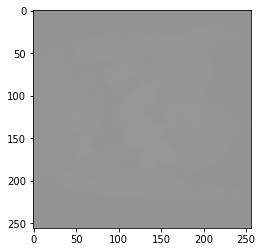

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.cm as cm
img = [] # some array of images
frames = [] # for storing the generated images

fig, ax = plt.subplots()
x,y,ss,tt =out.shape
ss=[0]

"""

ss=[1,10,11,20]
for i,f in enumerate(ss):
    for t in range(tt):
        axs.plot(data[:,:,f,t],cmap=cm.Greys_r)
        #frames.append([axs[i].imshow(data[:,:,f,t],cmap=cm.Greys_r,animated=True)])
    #plt.show()
"""

tt=70
for t in range(tt):
    temp=out[0,:,:,t]
    #f_t[mask]=0
    frames.append([ax.imshow(temp.detach().numpy(),cmap=cm.Greys_r,animated=True)])
#plt.show()


ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True,
                                repeat_delay=10)
#ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
#                                repeat_delay=1000)
ani.save("res.mp4")
plt.show()